In [103]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Geometric interpretation of SVD

The singular value decomposition $\mathbf{M} = U \Sigma V^*$ may be thought of as a series of geometric transformations that reproduce the total transformation performed by $\mathbf{M} x$. See: https://en.wikipedia.org/wiki/Singular_value_decomposition

[ 1.67705098  0.55901699]


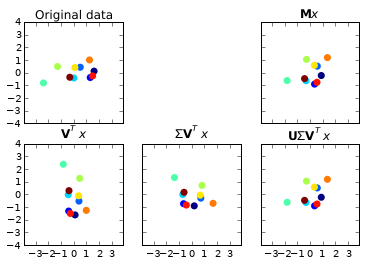

In [273]:

# The tranformation matrix
M = np.array([[ 0.50, 0.75], 
              [-0.25, 1.50]])

# Generate some random points scattered around the origin
N = 10
x = np.random.randn(2, N)

# Transform the points into the new coordinate system
x_trans = np.dot(M, x)
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, squeeze=True, subplot_kw={'aspect': 1.0})

# Plot the original and transformed data
axs[0, 0].scatter(x[0], x[1], 50, np.arange(N), edgecolor='none')
axs[0, 0].set_title('Original data')
axs[0, 1].set_axis_off()
axs[0, 2].scatter(x_trans[0], x_trans[1], 50, np.arange(N), edgecolor='none')
axs[0, 2].set_title(r'$\mathbf{M} x$')

# Break the transformation down into a singular value decomposition
u, sigma, vt = np.linalg.svd(M)
vtx = np.dot(vt, x)
sigmavtx = np.dot(np.diag(sigma), vtx)
usigmavtx = np.dot(u, sigmavtx)

# Plot the three transforamtional steps in the SVD
axs[1, 0].scatter(vtx[0], vtx[1], 50, np.arange(N), edgecolor='none')
axs[1, 0].set_title(r'$\mathbf{V}^T x$')
axs[1, 1].scatter(sigmavtx[0], sigmavtx[1], 50, np.arange(N), edgecolor='none')
axs[1, 1].set_title(r'$\Sigma \mathbf{V}^T x$')
axs[1, 2].scatter(usigmavtx[0], usigmavtx[1], 50, np.arange(N), edgecolor='none')
axs[1, 2].set_title(r'$\mathbf{U} \Sigma \mathbf{V}^T x$')

ax = axs[0, 0]
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
print(sigma)

### SVD for image compression

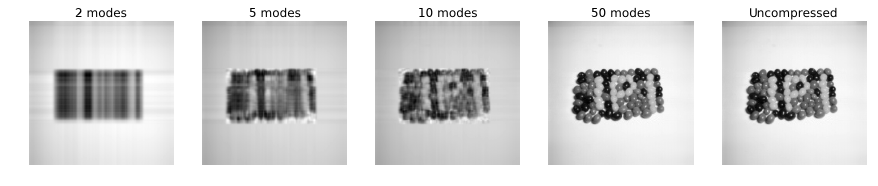

In [173]:
from PIL import Image

# Image source: https://en.wikipedia.org/wiki/Standard_test_image
JB = Image.open("SIPI_Jelly_Beans_4.1.07.tiff") 
im = np.array(JB).sum(axis=-1) # sum color bands to get psudo-grayscale

# Decompose image
u, sigma, vt = np.linalg.svd(im)

Ncompression = [2, 5, 10, 50]
fig, axs = plt.subplots(1, 5, figsize=(15, 3), squeeze=True,)

n = len(sigma)

for Nsubplot in range(4):
    D = np.zeros((n, n))
    modes = Ncompression[Nsubplot]
    D[:modes, :modes] = np.diag(sigma[:modes])
    im_compressed = np.dot(u, np.dot(D, vt))
    axs[Nsubplot].imshow(im_compressed, cmap='gray')
    axs[Nsubplot].set_title('%d modes' % modes)
    axs[Nsubplot].set_axis_off()

axs[-1].imshow(im_compressed, cmap='gray')
axs[-1].set_title('Uncompressed')
axs[-1].set_axis_off()

### SVD for least squares approximation

To solve the problem $\mathbf{A} x = b$ for $x$, the general solution is: $x = (\mathbf{A}^T \mathbf{A})^{−1} \mathbf{A}^T b$.  However, if $(\mathbf{A} \mathbf{A}^T)^{-1}$ is singular, singular value decomposition of $\mathbf{A} = U \Sigma V^*$ may be used to solve the problem:  $x^+ = \mathbf{A}^+ b ≈ V D^{−1} U^T b$

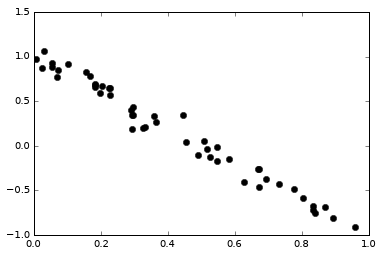

In [262]:
# create some data on a line with noise
N = 50
x = np.random.rand(N)
y = 1.0 -2.0*x + 0.1*np.random.randn(N)
plt.plot(x, y, 'ok')

In [212]:
# A matrix with powers of the data locations in x
A = np.vstack((x**0, x**1)).T

# Solve using straightforward inverse
p = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y)
print('Polynomial coefficients (INV):', p)

# Solve using SVD
u, sigma, vt = np.linalg.svd(A)
Dinv = np.zeros((vt.shape[0], u.shape[0]))
Dinv[:len(sigma), :len(sigma)] = np.diag(1.0/sigma)
p = np.dot(vt.T, np.dot(Dinv, np.dot(u.T, y)))
print('Polynomial coefficients (SVD):', p)

('Polynomial coefficients (INV):', array([ 1.04458156, -2.06393514]))
('Polynomial coefficients (SVD):', array([ 1.04458156, -2.06393514]))


In [261]:
# Create some random matrix, A, where A is MxN.
# Recall: M > N means overdetermined, like the typical least squares case.
M = 10
N = 20

# Solve A x = b for x given b; len(x)==N, and len(b)==M
A = np.random.rand(M, N)
b = np.random.rand(M, 1)

x = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), b)
print('Polynomial coefficients (INV):', x.flatten())

# Solve using SVD
u, sigma, vt = np.linalg.svd(A)
Dinv = np.zeros((vt.shape[0], u.shape[0]))
Dinv[:len(sigma), :len(sigma)] = np.diag(1.0/sigma)
x = np.dot(vt.T, np.dot(Dinv, np.dot(u.T, b)))
print('Polynomial coefficients (SVD):', x.flatten())
print('\n')
print('Sigmas: ', sigma)

('Polynomial coefficients (INV):', array([ -1.54758085, -57.19087412, -40.49180435, -59.28239935,
        65.16462448,   5.39920668,  11.59422101,  90.52969743,
       -25.33409582,  16.08462728,  14.82632645,  -2.06078545,
        17.07281622,  -1.05489193, -13.93913435,   1.17591892,
         3.51893669,  -3.48078333,  -6.05338102,  -2.1140231 ]))
('Polynomial coefficients (SVD):', array([-0.07064462,  0.09483059,  0.023304  ,  0.17179403,  0.26696142,
       -0.09888756, -0.25010433,  0.15426134,  0.20148467,  0.14612168,
       -0.24304957,  0.20586446, -0.04875668, -0.15403589, -0.03237985,
       -0.05886637, -0.00757278,  0.09973325,  0.34837318, -0.12080298]))


('Sigmas: ', array([ 7.46157709,  1.94812544,  1.87036935,  1.50214921,  1.2991541 ,
        1.13661035,  1.04761639,  0.9095537 ,  0.70590533,  0.61496948]))
